# Matrix analysis

This document summarizes the existing Altshuller Matrix and describes basic information connected with it.

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append('..')

from collections import Counter
from src.visualization import plot_settings

At first, let's import data for the matrix. 

In [59]:
principles = pd.read_csv('../data/raw/matrix_values.csv', 
                     sep=';', 
                     header=None)
parameters = pd.read_csv('../data/raw/matrix_parameters.csv', 
                         sep=';', 
                         header=None, 
                         index_col=0)

matrix = pd.DataFrame(principles.values, 
                      index=[i for i in range(1, 40)],
                      columns=[i for i in range(1, 40)])

matrix = matrix.fillna(0)

In [60]:
matrix_transf = matrix.map(lambda x: str(x).split(',')).values.flatten()
principles = [item.strip() for sublist in matrix_transf for item in sublist if item.strip().isdigit()]

df = pd.DataFrame(principles, columns=['Principle'])
df_counts = df['Principle'].value_counts().reset_index()
df_counts.columns = ['Principle', 'Count']
df_counts['Principle'] = df_counts['Principle'].astype(int)
empty = df_counts[df_counts['Principle'] == 0]
df_counts = df_counts[df_counts['Principle'] != 0]
plot_order_count = df_counts.sort_values('Count', ascending=False)['Principle']
plot_order_princ = df_counts.sort_values('Principle', ascending=True)['Principle']

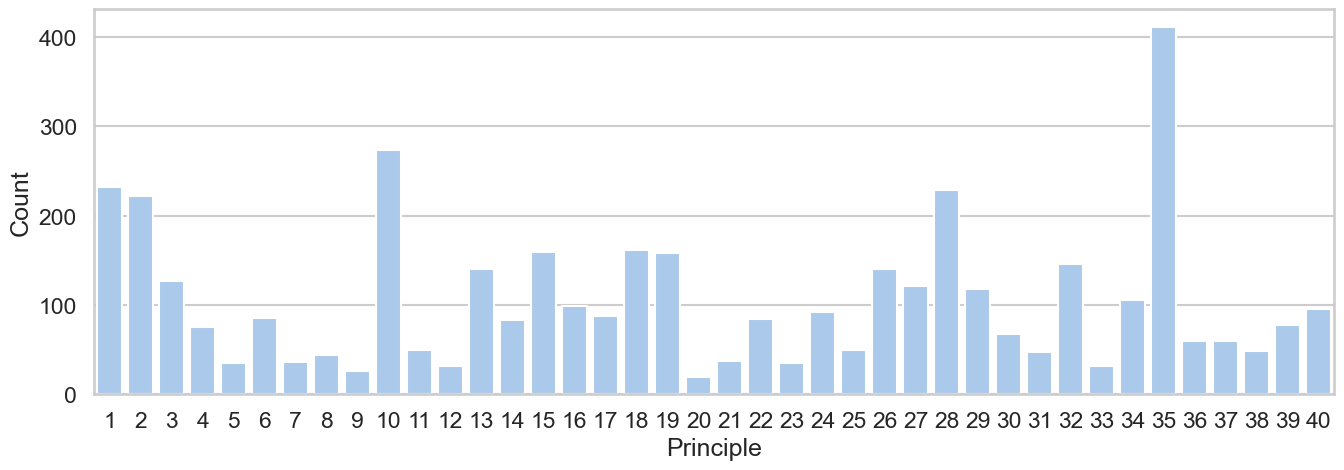

In [61]:
fig, axes = plt.subplots(figsize=(16, 5))
sns.barplot(x='Principle', 
            y='Count', 
            data=df_counts)
plt.show()


In [62]:
n_par = len(parameters)
n_fld = n_par ** 2 - n_par
n_empty = empty[empty['Principle'] == 0]['Count'].iloc[0]
sum_princ = df_counts['Count'].sum()
df_counts['ratio'] = round((100 * df_counts['Count'] / sum_princ),2)

print(f'Number of valid fields in the matrix: {n_fld}')
print(f'Number of empty fields in the matrix: {n_empty} ({(100 * n_empty / n_fld):.2f} %)')
print(f'Number of principles occurences: {sum_princ}')

print('Top used principles (5):')
print(df_counts.head())
print('---------------')
print('Least used principles (<1%):')
print(df_counts[df_counts['ratio'] < 1])

Number of valid fields in the matrix: 1482
Number of empty fields in the matrix: 270 (18.22 %)
Number of principles occurences: 4195
Top used principles (5):
   Principle  Count  ratio
0         35    411   9.80
1         10    274   6.53
3          1    232   5.53
4         28    229   5.46
5          2    222   5.29
---------------
Least used principles (<1%):
    Principle  Count  ratio
33         21     37   0.88
34          7     36   0.86
35         23     35   0.83
36          5     35   0.83
37         12     32   0.76
38         33     31   0.74
39          9     26   0.62
40         20     19   0.45


In [63]:
# Reload matrix_values.csv with ";" as the delimiter
matrix_values_df = pd.read_csv('../data/raw/matrix_values.csv', 
                    sep=';', 
                    header=None)

# Converting the data into a format where each cell is a list of principles
matrix_values_lists = matrix_values_df.map(lambda x: [int(item.strip()) for item in str(x).split(',') if item.strip().isdigit()])

# Counting occurrences in rows and columns
row_appearances = Counter()
col_appearances = Counter()

for _, row in matrix_values_lists.iterrows():
    row_principles = set()
    for principles in row:
        row_principles.update(principles)
    row_appearances.update(row_principles)

for col in matrix_values_lists:
    col_principles = set()
    for principles in matrix_values_lists[col]:
        col_principles.update(principles)
    col_appearances.update(col_principles)

# Counting total occurrences of each principle
total_counts = Counter()
for _, row in matrix_values_lists.iterrows():
    for principles in row:
        total_counts.update(principles)

# Preparing the data for plotting
scatter_data = pd.DataFrame({
    'Principle': range(1, 41),
    'Row_Appearances': [row_appearances.get(i, 0) for i in range(1, 41)],
    'Col_Appearances': [col_appearances.get(i, 0) for i in range(1, 41)],
    'Total_Count': [total_counts.get(i, 0) for i in range(1, 41)]
})
scatter_data['assym'] = abs(1- scatter_data['Col_Appearances'] / scatter_data['Row_Appearances'])
scatter_data.sort_values('assym',ascending=False, inplace=True)

scatter_data_sym = scatter_data[scatter_data['Row_Appearances'] == scatter_data['Col_Appearances']]
scatter_data = scatter_data[scatter_data['Row_Appearances'] != scatter_data['Col_Appearances']]
print(f"Number of principles with row/col assymetry: {len(scatter_data)}")
print(f"Number of principles with equal row/col appearance: {len(scatter_data_sym)}")

Number of principles with row/col assymetry: 32
Number of principles with equal row/col appearance: 8


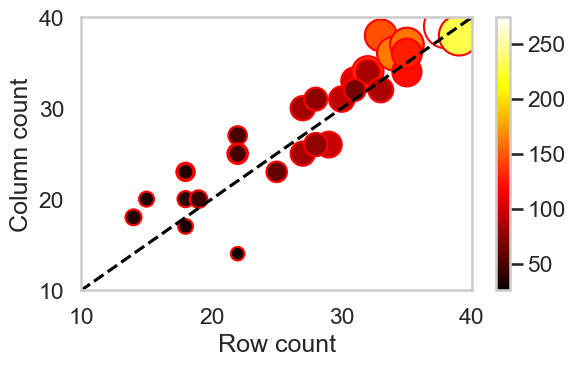

In [64]:
# Normalizing the total count for point size (to make the scatter points visible and proportional)
max_count = scatter_data['Total_Count'].max()
scatter_data['Point_Size'] = (scatter_data['Total_Count'] / max_count) * 1000  # Scaling the size

# Creating the scatter plot
scatter = plt.scatter(scatter_data['Row_Appearances'], scatter_data['Col_Appearances'], 
                      s=scatter_data['Point_Size'], c=scatter_data['Total_Count'], 
                      cmap='hot', alpha=1, edgecolors='r')

# Adding color bar
plt.colorbar(scatter)
plt.plot([0, 40], [0, 40], 'k--')

# Setting the axis limits
plt.xlim(10, 40)
plt.ylim(10, 40)

# Adding labels and title
plt.xlabel('Row count')
plt.ylabel('Column count')

plt.grid(False)
plt.show()